In [22]:
"""
=============================================================
- EE655000 Machine Learning HW3
-------------------------------------------------------------
- Subject: Handcraft 2-/3-Layer Neural Network
-------------------------------------------------------------
- Author: Jason Hao-Jiun Tu (107060011)
- Date: 2022.05.29
=============================================================
"""
import random
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from os import listdir

class preprocess():
    def __init__(self):
        self.x_train = []
        self.y_train = []
        self.y_train_onehot = []
        self.x_test = []
        self.y_test = []
        self.y_test_onehot = []
    
    def load(self, path, label):
        for filename in listdir(path):
            #=== load image ===#
            img = Image.open(path + filename)
            img = np.array(img)
            # print(f'=> load {filename} : {img.shape}')
            
            if label==0:
                label_onehot = [1, 0, 0]
            elif label==1:
                label_onehot = [0, 1, 0]
            elif label==2:
                label_onehot = [0, 0, 1]
            else:
                print('#=== ERROR ===# : Wrong labelling !')
                
            #=== store loaded image ===#
            if 'train' in path:
                self.x_train.append(img)
                self.y_train.append(label)
                self.y_train_onehot.append(label_onehot)
            elif 'test' in path:
                self.x_test.append(img)
                self.y_test.append(label)
                self.y_test_onehot.append(label_onehot)
            else:
                print('#=== ERROR ===# : Wrong path !')
                
        print(f'Total images: train={len(self.x_train)}, test={len(self.x_test)}')

    def shuffle(self):
        print(f'Before shuffle: \n {self.y_train}')
        zipped_train = list(zip(self.x_train, self.y_train, self.y_train_onehot))
        random.shuffle(zipped_train)
        self.x_train, self.y_train, self.y_train_onehot = zip(*zipped_train) # unzip
        print(f'After shuffle: \n {self.y_train}')
        
    def feature_scaling(self):
        x_train = np.array(self.x_train, dtype=np.float64)
        y_train = np.array(self.y_train)
        y_train_onehot = np.array(self.y_train_onehot)
        img_size, h, w, ch = x_train.shape
        x_train = x_train.reshape((img_size, h*w*ch))
        print(f'x_train shape: {x_train.shape}')
        
        x_test = np.array(self.x_test, dtype=np.float64)
        y_test = np.array(self.y_test)
        y_test_onehot = np.array(self.y_test_onehot)
        img_size, h, w, ch = x_test.shape
        x_test = x_test.reshape((img_size, h*w*ch))
        
        scaler = StandardScaler().fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        
        self.x_train = x_train
        self.y_train = y_train
        self.y_train_onehot = y_train_onehot
        self.x_test = x_test
        self.y_test = y_test
        self.y_test_onehot = y_test_onehot        
        
    def dimension_reduction(self):
        pca = PCA(n_components=2).fit(self.x_train)
        x_train_pca = pca.transform(self.x_train)
        x_test_pca = pca.transform(self.x_test)
        print(f'x_train_pca shape: {x_train_pca.shape}')
        
        target_names = ['Carambula', 'Lychee', 'Pear']
        targets = [0, 1, 2]
        fig = plt.figure(figsize=(12, 8))
        plt1_1 = fig.add_subplot(121)
        plt1_2 = fig.add_subplot(122)
        
        #=== Plot Train set distribution ===#
        for target, target_name, c, marker in zip(targets, target_names, 'rgb', 'sxo'):
            label_idx = np.where(self.y_train==target)[0]
            plt1_1.scatter(x_train_pca[label_idx, 0], x_train_pca[label_idx, 1], label=target_name, c=c, marker=marker)
  
        plt1_1.set_title('Train')
        plt1_1.set_xlabel('X')
        plt1_1.set_ylabel('Y')
        plt1_1.legend()
        
        #=== Plot Test set distribution ===#
        for target, target_name, c, marker in zip(targets, target_names, 'rgb', 'sxo'):
            label_idx = np.where(self.y_test==target)[0]
            plt1_2.scatter(x_test_pca[label_idx, 0], x_test_pca[label_idx, 1], label=target_name, c=c, marker=marker)
  
        plt1_2.set_title('Test')
        plt1_2.set_xlabel('X')
        plt1_2.set_ylabel('Y')
        plt1_2.legend()
        plt.savefig("dataset_distribution.png", dpi=120)
        plt.show()
        
        self.x_train = x_train_pca
        self.x_test = x_test_pca

## Start data preprocessing

In [23]:
Prep = preprocess()
#=== Train set ===#
Prep.load('./Data_train/Carambula/', 0)
Prep.load('./Data_train/Lychee/', 1)
Prep.load('./Data_train/Pear/', 2)
#=== Test set ===#
Prep.load('./Data_test/Carambula/', 0)
Prep.load('./Data_test/Lychee/', 1)
Prep.load('./Data_test/Pear/', 2)

Total images: train=490, test=0
Total images: train=980, test=0
Total images: train=1470, test=0
Total images: train=1470, test=166
Total images: train=1470, test=332
Total images: train=1470, test=498


In [24]:
Prep.shuffle()

Before shuffle: 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [25]:
Prep.feature_scaling()

x_train shape: (1470, 2048)


x_train_pca shape: (1470, 2)


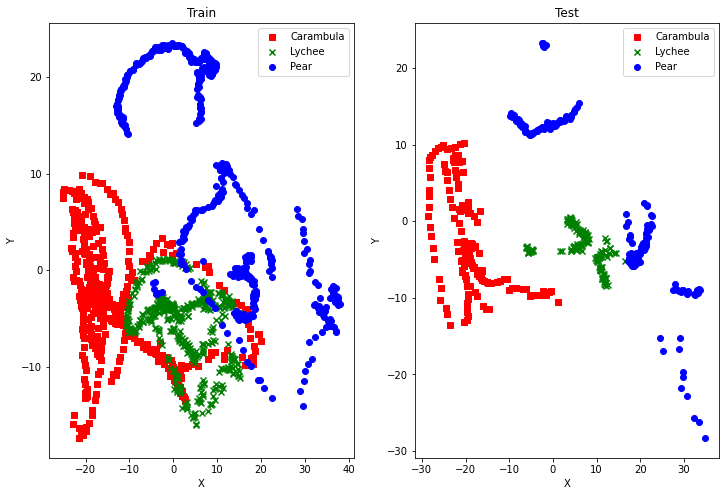

In [26]:
Prep.dimension_reduction()

In [27]:
print(Prep.x_train.shape)
print(Prep.x_test.shape)

(1470, 2)
(498, 2)


## 2-layer neural network model

In [28]:
class layer2_nn():
    def __init__(self, sizes):
        #=== define size of each layer ===#
        self.input_layer_size = sizes[0]
        self.hidden_layer_size = sizes[1]
        self.output_layer_size = sizes[2]
        
        #=== initialize weights ===#
        self.W1 = 0.01 * np.random.randn(self.input_layer_size, self.hidden_layer_size)
        self.W2 = 0.01 * np.random.randn(self.hidden_layer_size, self.output_layer_size)
        #=== initialize bisaes ===#
        self.B1 = 0.01 * np.random.randn(1, self.hidden_layer_size)
        self.B2 = 0.01 * np.random.randn(1, self.output_layer_size)
        #=== initialize gradients ===#
        self.dW1 = np.ones((self.input_layer_size, self.hidden_layer_size))
        self.dW2 = np.ones((self.hidden_layer_size, self.output_layer_size))
        self.dB1 = np.ones((1, self.hidden_layer_size))
        self.dB2 = np.ones((1, self.output_layer_size))
        
        #=== activation output ===#
        # 1. sigmoid
        self.act_out1 = np.ones((1, self.hidden_layer_size))
        # 2. soft1
        self.act_out2 = np.ones((1, self.output_layer_size))
        
        #=== Evaluation ===#
        self.train_acc = []
        self.train_loss = []
        self.val_acc = []
        self.val_loss = []

    def forward_pass(self, X):
        Z1 = np.matmul(X, self.W1) + self.B1
        act_out1 = self.sigmoid(Z1)
        Z2 = np.matmul(act_out1, self.W2) + self.B2
        act_out2 = self.softmax(Z2)
        
        self.act_out1 = act_out1
        self.act_out2 = act_out2
        
    def backward_prop(self, X, target):
        #=== gradient to W2/B2 ===#
        # derivative of softmax
        dZ2 = self.act_out2-target                  # (1,3) 
        self.dW2 = np.matmul(self.act_out1.T, dZ2)  # (5,1)*(1,3)
        self.dB2 = 1.*dZ2
        # print(f'dW2: {dW2.shape}')
        # print(f'dB2: {dB2.shape}')

        #=== gradient to W1/B1 ===#
        # derivative of sigmoid
        dA1 = self.act_out1*(1-self.act_out1)       # (1,5)
        dZ1 = dA1 * np.matmul(dZ2, self.W2.T)       # (1,3)*(3,5) = (1,5)
        self.dW1 = np.matmul(X.T, dZ1)              # (2,1)*(1,5) = (2,5)
        self.B1 = 1.*dZ1                            # (1,5)
        # print(f'dA1: {dA1.shape}')    
        # print(f'dZ1: {dZ1.shape}')
        # print(f'dW1: {dW1.shape}')
        # print(f'dB1: {dB1.shape}')
        
    def sigmoid(self, Z):
        return 1/(1+np.exp(-Z))
    
    def softmax(self, Z):
        exps = np.exp(Z)
        return exps/np.sum(exps)
    
    def update(self, lr):
        self.W1 -= lr * self.dW1
        self.B1 -= lr * self.dB1
        self.W2 -= lr * self.dW2
        self.B2 -= lr * self.dB2
    
    def acc_cal(self, target):
        y = np.argmax(target)
        y_pred = np.argmax(self.act_out2)
        if y==y_pred:
            self.correct += 1
        return y, y_pred
        
    def cross_entropy(self, target):
        '''
            L(y, ŷ) = −∑ylog(ŷ).
        '''
        self.total_loss += -np.sum(target * np.log(self.act_out2))
        
    def train(self, X, target, split_ratio, epochs, lr):
        img_size = X.shape[0]
        train_size = int(img_size*split_ratio)
        val_size = img_size-train_size

        for epoch in range(epochs):
            #=== Data Shuffling ===#
            permutation = np.random.permutation(img_size)
            X_ = X[permutation]
            target_ = target[permutation]
            
            print(f'==> epoch: {epoch}')
            self.correct = 0.
            self.total_loss = 0.
            for img in range(train_size):
                x_train = X_[img]
                y_train = target_[img]
                x_train = np.expand_dims(x_train, 0)
                y_train = np.expand_dims(y_train, 0)
                
                self.forward_pass(x_train)
                self.backward_prop(x_train, y_train)
                self.update(lr)
                self.acc_cal(y_train)
                self.cross_entropy(y_train)
            accuracy = self.correct/train_size
            loss = self.total_loss/train_size
            print(f'Train: Accuracy= {accuracy}, loss= {loss}')
            self.train_acc.append(accuracy)
            self.train_loss.append(loss)
            
            #=== Evaluation ===#
            self.correct = 0
            self.total_loss = 0
            for img in range(val_size):
                x_val = X_[img+train_size]
                y_val = target_[img+train_size]
                x_val = np.expand_dims(x_val, 0)
                y_val = np.expand_dims(y_val, 0)
                
                self.forward_pass(x_val)
                self.acc_cal(y_val)
                self.cross_entropy(y_val)
            accuracy = self.correct/val_size
            loss = self.total_loss/val_size
            print(f'Val  : Accuracy= {accuracy}, loss= {loss}')
            self.val_acc.append(accuracy)
            self.val_loss.append(loss)
            
        self.plot_train_loss(epochs)
            
    def test(self, X, target):
        img_size = X.shape[0]
        Y = []
        Y_pred = []
        self.correct = 0
        self.total_loss = 0
        for img in range(img_size):
            x_test = X[img]
            y_test = target[img]
            x_test = np.expand_dims(x_test, 0)
            y_test = np.expand_dims(y_test, 0)

            self.forward_pass(x_test)
            y, y_pred = self.acc_cal(y_test)
            self.cross_entropy(y_test)
            Y.append(y)
            Y_pred.append(y_pred)
        accuracy = self.correct/img_size
        loss = self.total_loss/img_size
        print(f'Accuracy= {accuracy}, loss= {loss}')
        
        Y = np.array(Y)
        Y_pred = np.array(Y_pred)
        self.plot_test_distribution(X, Y, Y_pred)
        return Y_pred
    
    def predict(self, X):
        img_size = X.shape[0]
        y_pred = []
        for img in range(img_size):
            x = X[img]
            x = np.expand_dims(x, 0)
            self.forward_pass(x)
            y_pred.append(np.argmax(self.act_out2))
        return np.array(y_pred)
    
    #=== Evaluation ===#
    def plot_train_loss(self, epochs):
        #=== Training/Validation Loss ===#
        epochs_ = np.linspace(1, epochs, epochs)
        train_loss_ = np.array(self.train_loss)
        val_loss_ = np.array(self.val_loss)
        fig, ax1 = plt.subplots()
        ax1.set_xlabel('Epochs', fontsize=12)
        ax1.set_ylabel('Loss', fontsize=12)
        ax1.plot(epochs_, train_loss_, color='r', label='Training Loss')
        ax1.plot(epochs_, val_loss_, color='b', label='Validation Loss')
        plt.legend(loc='center right', fontsize=10)
        plt.savefig("layer2_train_loss.png", dpi=120)
        plt.show()
        
    def plot_test_distribution(self, x_test, y_test, y_pred):
        target_names = ['Carambula', 'Lychee', 'Pear']
        targets = [0, 1, 2]
        fig = plt.figure(figsize=(12, 8))
        plt1_1 = fig.add_subplot(121)
        plt1_2 = fig.add_subplot(122)
        
        #=== Ground Truth ===#
        for target, target_name, c, marker in zip(targets, target_names, 'rgb', 'sxo'):
            label_idx = np.where(y_test==target)[0]
            plt1_1.scatter(x_test[label_idx, 0], x_test[label_idx, 1], label=target_name, c=c, marker=marker)
  
        plt1_1.set_title('Ground Truth')
        plt1_1.set_xlabel('X')
        plt1_1.set_ylabel('Y')
        plt1_1.legend()
        
        #=== Predict ===#
        for target, target_name, c, marker in zip(targets, target_names, 'rgb', 'sxo'):
            label_idx = np.where(y_pred==target)[0]
            plt1_2.scatter(x_test[label_idx, 0], x_test[label_idx, 1], label=target_name, c=c, marker=marker)
  
        plt1_2.set_title('Predict')
        plt1_2.set_xlabel('X')
        plt1_2.set_ylabel('Y')
        plt1_2.legend()
        plt.savefig("layer2_test_distribution.png", dpi=120)
        plt.show()
        

In [29]:
def plot_decision_regions(X, target, MLP, hidden_size, resolution=0.02):
    #=== Decision Region: Predict by NN model ===#
    cmap = ListedColormap(['r','g','b'])
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    x_2d, y_2d = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    y_pred = MLP.predict(np.array([x_2d.ravel(), y_2d.ravel()]).T)
    y_pred = y_pred.reshape(x_2d.shape)
    plt.figure(figsize=(14, 10))
    plt.contourf(x_2d, y_2d, y_pred, alpha=0.3, cmap=cmap)
    
    #=== Ground Truth ===#
    y = np.argmax(target, axis=1)
    target_names = ['Carambula', 'Lychee', 'Pear']
    targets = [0, 1, 2]
    for target_, target_name, c, marker in zip(targets, target_names, 'rgb', 'sxo'):
        label_idx = np.where(y==target_)[0]
        plt.scatter(X[label_idx, 0], X[label_idx, 1], label=target_name, c=c, marker=marker)
        
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)
    plt.title(f'Decision Region ({hidden_size}-Layer NN)', fontsize=20)
    plt.legend()
    plt.savefig(f'layer{hidden_size}_decision_region.png', dpi=100)

In [30]:
X = Prep.x_train
print(f'X shape: {X.shape}')
target = Prep.y_train_onehot
print(f'target shape: {target.shape}')

X shape: (1470, 2)
target shape: (1470, 3)


## Train the model with cross-validation

==> epoch: 0
Train: Accuracy= 0.6164965986394558, loss= 0.8489441537759794
Val  : Accuracy= 0.7891156462585034, loss= 0.5993120465839907
==> epoch: 1
Train: Accuracy= 0.7950680272108843, loss= 0.5351492328689675
Val  : Accuracy= 0.7925170068027211, loss= 0.4623176288429685
==> epoch: 2
Train: Accuracy= 0.8112244897959183, loss= 0.47876731310002996
Val  : Accuracy= 0.8163265306122449, loss= 0.43685191892088754
==> epoch: 3
Train: Accuracy= 0.8061224489795918, loss= 0.4473747163151116
Val  : Accuracy= 0.7857142857142857, loss= 0.5017455884706133
==> epoch: 4
Train: Accuracy= 0.814625850340136, loss= 0.4545313893318003
Val  : Accuracy= 0.8435374149659864, loss= 0.43749825006611254
==> epoch: 5
Train: Accuracy= 0.8248299319727891, loss= 0.44997824304080297
Val  : Accuracy= 0.8503401360544217, loss= 0.4258826947632775
==> epoch: 6
Train: Accuracy= 0.8197278911564626, loss= 0.46255837982805903
Val  : Accuracy= 0.8639455782312925, loss= 0.3526057382350671
==> epoch: 7
Train: Accuracy= 0.82993

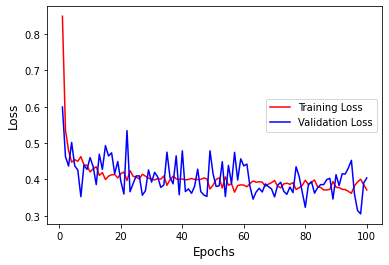

In [31]:
layer_sizes = [2, 20, 3]
MLP = layer2_nn(layer_sizes)
MLP.train(X, target, split_ratio=0.8, epochs=100, lr=0.005)

In [32]:
X = Prep.x_test
print(X.shape)
print(f'X shape: {X.shape}')
target = Prep.y_test_onehot
print(f'target shape: {target.shape}')

(498, 2)
X shape: (498, 2)
target shape: (498, 3)


## Test the model

Accuracy= 0.9558232931726908, loss= 0.26464565025818165


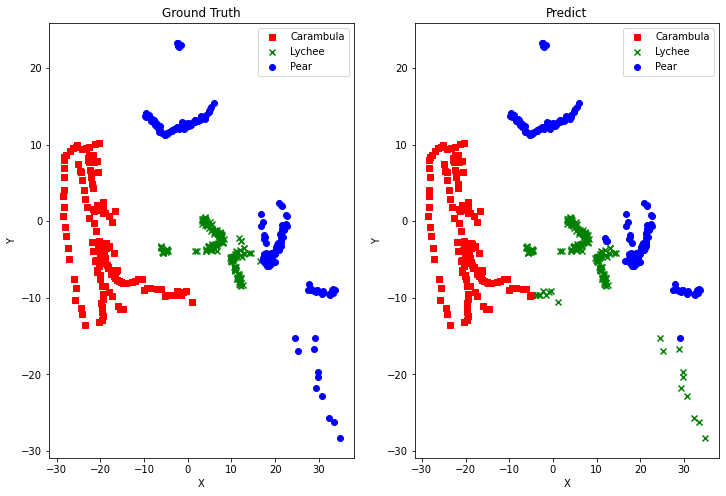

Predict: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 

In [33]:
y_pred = MLP.test(X, target)
print(f'Predict: \n{y_pred}\n')

In [34]:
print(f'Target:  \n{Prep.y_test}\n')

Target:  
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 

## Decision Region

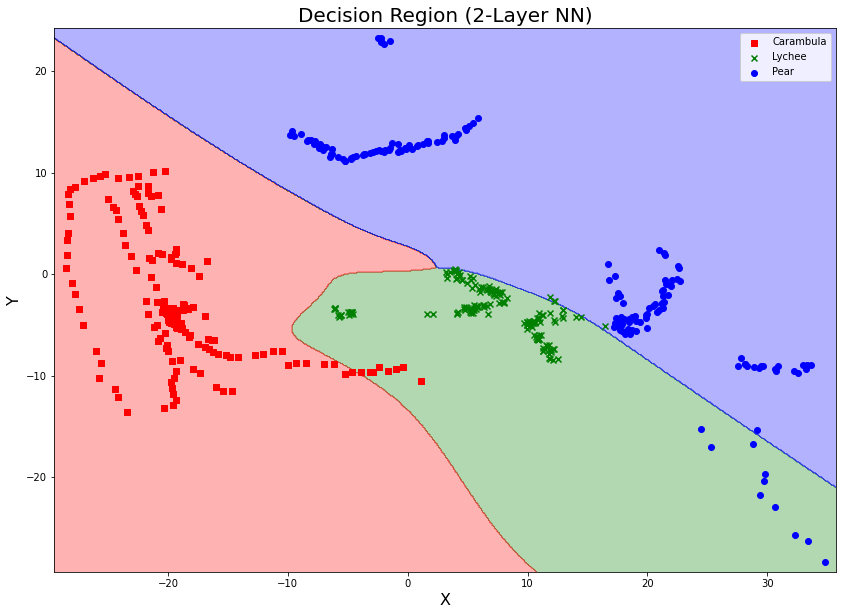

In [35]:
plot_decision_regions(X, target, MLP, hidden_size=2, resolution=0.1)

## 3-layer neural network model

In [36]:
class layer3_nn():
    def __init__(self, sizes):
        #=== define size of each layer ===#
        self.input_layer_size = sizes[0]
        self.hidden_layer1_size = sizes[1]
        self.hidden_layer2_size = sizes[2]
        self.output_layer_size = sizes[3]
        
        #=== initialize weights ===#
        self.W1 = 0.1 * np.random.randn(self.input_layer_size, self.hidden_layer1_size)
        self.W2 = 0.1 * np.random.randn(self.hidden_layer1_size, self.hidden_layer2_size)
        self.W3 = 0.1 * np.random.randn(self.hidden_layer2_size, self.output_layer_size)
        #=== initialize bisaes ===#
        self.B1 = 0.1 * np.random.randn(1, self.hidden_layer1_size)
        self.B2 = 0.1 * np.random.randn(1, self.hidden_layer2_size)
        self.B3 = 0.1 * np.random.randn(1, self.output_layer_size)
        #=== initialize gradients ===#
        self.dW1 = np.ones((self.input_layer_size, self.hidden_layer1_size))
        self.dW2 = np.ones((self.hidden_layer1_size, self.hidden_layer2_size))
        self.dW3 = np.ones((self.hidden_layer2_size, self.output_layer_size))
        self.dB1 = np.ones((1, self.hidden_layer1_size))
        self.dB2 = np.ones((1, self.hidden_layer2_size))
        self.dB3 = np.ones((1, self.output_layer_size))
        
        #=== activation output ===#
        # 1. sigmoid
        self.act_out1 = np.ones((1, self.hidden_layer1_size))
        self.act_out2 = np.ones((1, self.hidden_layer2_size))
        # 2. softmax
        self.act_out3 = np.ones((1, self.output_layer_size))
        
        #=== Evaluation ===#
        self.train_acc = []
        self.train_loss = []
        self.val_acc = []
        self.val_loss = []

    def forward_pass(self, X):
        Z1 = np.matmul(X, self.W1) + self.B1
        act_out1 = self.sigmoid(Z1)
        Z2 = np.matmul(act_out1, self.W2) + self.B2
        act_out2 = self.sigmoid(Z2)
        Z3 = np.matmul(act_out2, self.W3) + self.B3
        act_out3 = self.softmax(Z3)
        
        self.act_out1 = act_out1
        self.act_out2 = act_out2
        self.act_out3 = act_out3
        
    def backward_prop(self, X, target):
        #=== gradient to W3/B3 ===#
        # derivative of softmax
        dZ3 = self.act_out3-target                  # (1,3) 
        self.dW3 = np.matmul(self.act_out2.T, dZ3)  # (5,1)*(1,3)
        self.dB3 = 1.*dZ3
        # print(f'dW3: {dW3.shape}')
        # print(f'dB3: {dB3.shape}')
        
        #=== gradient to W2/B2 ===#
        # derivative of sigmoid
        dA2 = self.act_out2*(1-self.act_out2)       # (1,5)
        dZ2 = dA2 * np.matmul(dZ3, self.W3.T)       # (1,3)*(3,5) = (1,5)
        self.dW2 = np.matmul(self.act_out1.T, dZ2)  # (5,1)*(1,5) = (5,5)
        self.dB2 = 1.*dZ2                           # (1,5)
        # print(f'dA2: {dA2.shape}')    
        # print(f'dZ2: {dZ2.shape}')
        # print(f'dW2: {dW2.shape}')
        # print(f'dB2: {dB2.shape}')

        #=== gradient to W1/B1 ===#
        # derivative of sigmoid
        dA1 = self.act_out1*(1-self.act_out1)       # (1,5)
        dZ1 = dA1 * np.matmul(dZ2, self.W2.T)       # (1,5)*(5,5) = (1,5)
        self.dW1 = np.matmul(X.T, dZ1)              # (2,1)*(1,5) = (2,5)
        self.dB1 = 1.*dZ1                           # (1,5)
        # print(f'dA1: {dA1.shape}')    
        # print(f'dZ1: {dZ1.shape}')
        # print(f'dW1: {dW1.shape}')
        # print(f'dB1: {dB1.shape}')
        
    def sigmoid(self, Z):
        return 1/(1+np.exp(-Z))
    
    def softmax(self, Z):
        exps = np.exp(Z)
        return exps/np.sum(exps)
    
    def update(self, lr):
        self.W1 -= lr * self.dW1
        self.B1 -= lr * self.dB1
        self.W2 -= lr * self.dW2
        self.B2 -= lr * self.dB2
        self.W3 -= lr * self.dW3
        self.B3 -= lr * self.dB3
    
    def acc_cal(self, target):
        y = np.argmax(target)
        y_pred = np.argmax(self.act_out3)
        if y==y_pred:
            self.correct += 1
        return y, y_pred
    
    def cross_entropy(self, target):
        '''
            L(y, ŷ) = −∑ylog(ŷ).
        '''
        self.total_loss += -np.sum(target * np.log(self.act_out3))
        
    def train(self, X, target, split_ratio, epochs, lr):
        img_size = X.shape[0]
        train_size = int(img_size*split_ratio)
        val_size = img_size-train_size

        for epoch in range(epochs):
            #=== Data Shuffling ===#
            permutation = np.random.permutation(img_size)
            X_ = X[permutation]
            target_ = target[permutation]
            
            print(f'==> epoch: {epoch}')
            self.correct = 0.
            self.total_loss = 0.
            for img in range(train_size):
                x_train = X_[img]
                y_train = target_[img]
                x_train = np.expand_dims(x_train, 0)
                y_train = np.expand_dims(y_train, 0)
                
                self.forward_pass(x_train)
                self.backward_prop(x_train, y_train)
                self.update(lr)
                self.acc_cal(y_train)
                self.cross_entropy(y_train)
            accuracy = self.correct/train_size
            loss = self.total_loss/train_size
            print(f'Train: Accuracy= {accuracy}, loss= {loss}')
            self.train_acc.append(accuracy)
            self.train_loss.append(loss)
            
            #=== Evaluation ===#
            self.correct = 0
            self.total_loss = 0
            for img in range(val_size):
                x_val = X_[img+train_size]
                y_val = target_[img+train_size]
                x_val = np.expand_dims(x_val, 0)
                y_val = np.expand_dims(y_val, 0)
                
                self.forward_pass(x_val)
                self.acc_cal(y_val)
                self.cross_entropy(y_val)
            accuracy = self.correct/val_size
            loss = self.total_loss/val_size
            print(f'Val  : Accuracy= {accuracy}, loss= {loss}')
            self.val_acc.append(accuracy)
            self.val_loss.append(loss)
            
        self.plot_train_loss(epochs)
            
    def test(self, X, target):
        img_size = X.shape[0]
        Y = []
        Y_pred = []
        self.correct = 0
        self.total_loss = 0
        for img in range(img_size):
            x_test = X[img]
            y_test = target[img]
            x_test = np.expand_dims(x_test, 0)
            y_test = np.expand_dims(y_test, 0)

            self.forward_pass(x_test)
            y, y_pred = self.acc_cal(y_test)
            self.cross_entropy(y_test)
            Y.append(y)
            Y_pred.append(y_pred)
        accuracy = self.correct/img_size
        loss = self.total_loss/img_size
        print(f'Accuracy= {accuracy}, loss= {loss}')
        
        Y = np.array(Y)
        Y_pred = np.array(Y_pred)
        self.plot_test_distribution(X, Y, Y_pred)
        return Y_pred
    
    def predict(self, X):
        img_size = X.shape[0]
        y_pred = []
        for img in range(img_size):
            x = X[img]
            x = np.expand_dims(x, 0)
            self.forward_pass(x)
            y_pred.append(np.argmax(self.act_out3))
        return np.array(y_pred)
    
    #=== Evaluation ===#
    def plot_train_loss(self, epochs):
        #=== Training/Validation Loss ===#
        epochs_ = np.linspace(1, epochs, epochs)
        train_loss_ = np.array(self.train_loss)
        val_loss_ = np.array(self.val_loss)
        fig, ax1 = plt.subplots()
        ax1.set_xlabel('Epochs', fontsize=12)
        ax1.set_ylabel('Loss', fontsize=12)
        ax1.plot(epochs_, train_loss_, color='r', label='Training Loss')
        ax1.plot(epochs_, val_loss_, color='b', label='Validation Loss')
        plt.legend(loc='center right', fontsize=10)
        plt.savefig("layer3_train_loss.png", dpi=120)
        plt.show()
        
    def plot_test_distribution(self, x_test, y_test, y_pred):
        target_names = ['Carambula', 'Lychee', 'Pear']
        targets = [0, 1, 2]
        fig = plt.figure(figsize=(12, 8))
        plt1_1 = fig.add_subplot(121)
        plt1_2 = fig.add_subplot(122)
        #=== Ground Truth ===#
        for target, target_name, c, marker in zip(targets, target_names, 'rgb', 'sxo'):
            label_idx = np.where(y_test==target)[0]
            plt1_1.scatter(x_test[label_idx, 0], x_test[label_idx, 1], label=target_name, c=c, marker=marker)
  
        plt1_1.set_title('Ground Truth')
        plt1_1.set_xlabel('X')
        plt1_1.set_ylabel('Y')
        plt1_1.legend()
        
        #=== Predict ===#
        for target, target_name, c, marker in zip(targets, target_names, 'rgb', 'sxo'):
            label_idx = np.where(y_pred==target)[0]
            plt1_2.scatter(x_test[label_idx, 0], x_test[label_idx, 1], label=target_name, c=c, marker=marker)
  
        plt1_2.set_title('Predict')
        plt1_2.set_xlabel('X')
        plt1_2.set_ylabel('Y')
        plt1_2.legend()
        plt.savefig("layer3_test_distribution.png", dpi=120)
        plt.show()

In [37]:
X = Prep.x_train
print(f'X shape: {X.shape}')
target = Prep.y_train_onehot
print(f'target shape: {target.shape}')

X shape: (1470, 2)
target shape: (1470, 3)


## Train the model with cross-validation

==> epoch: 0
Train: Accuracy= 0.3903061224489796, loss= 1.0780108147099587
Val  : Accuracy= 0.35374149659863946, loss= 1.0395289897354079
==> epoch: 1
Train: Accuracy= 0.6292517006802721, loss= 0.958700393281087
Val  : Accuracy= 0.7448979591836735, loss= 0.8428133066331939
==> epoch: 2
Train: Accuracy= 0.7210884353741497, loss= 0.7613367087465793
Val  : Accuracy= 0.7619047619047619, loss= 0.6683335733117344
==> epoch: 3
Train: Accuracy= 0.7380952380952381, loss= 0.6452181186109593
Val  : Accuracy= 0.8027210884353742, loss= 0.5750034806122818
==> epoch: 4
Train: Accuracy= 0.7721088435374149, loss= 0.5812999968449847
Val  : Accuracy= 0.8197278911564626, loss= 0.5784097828172711
==> epoch: 5
Train: Accuracy= 0.7925170068027211, loss= 0.5535159320810993
Val  : Accuracy= 0.782312925170068, loss= 0.503843526673932
==> epoch: 6
Train: Accuracy= 0.8027210884353742, loss= 0.5134315887797705
Val  : Accuracy= 0.7959183673469388, loss= 0.528827419951465
==> epoch: 7
Train: Accuracy= 0.813775510204

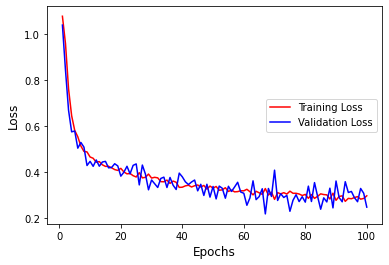

In [38]:
layer_sizes = [2, 20, 20, 3]
MLP = layer3_nn(layer_sizes)
MLP.train(X, target, split_ratio=0.8, epochs=100, lr=0.005)

In [39]:
X = Prep.x_test
print(X.shape)
print(f'X shape: {X.shape}')
target = Prep.y_test_onehot
print(f'target shape: {target.shape}')

(498, 2)
X shape: (498, 2)
target shape: (498, 3)


## Test the model

Accuracy= 0.9598393574297188, loss= 0.17156423963705347


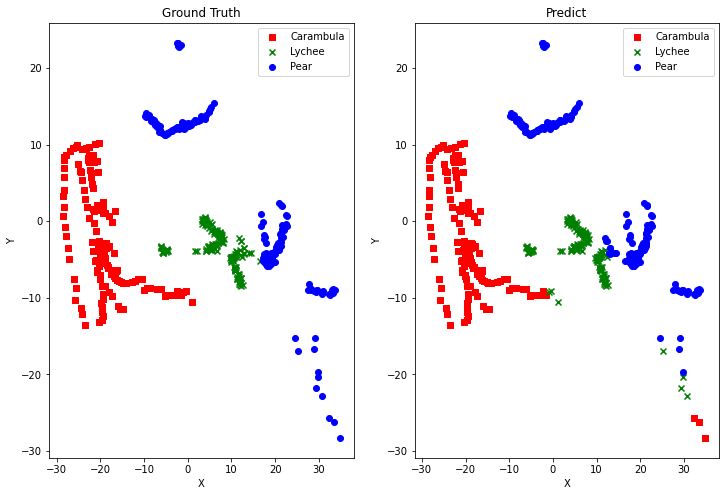

Predict: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 2 1 2 2 2 2 2 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 0 0 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 

In [40]:
y_pred = MLP.test(X, target)
print(f'Predict: \n{y_pred}\n')

In [41]:
print(f'Target:  \n{Prep.y_test}\n')

Target:  
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 

## Decision Region

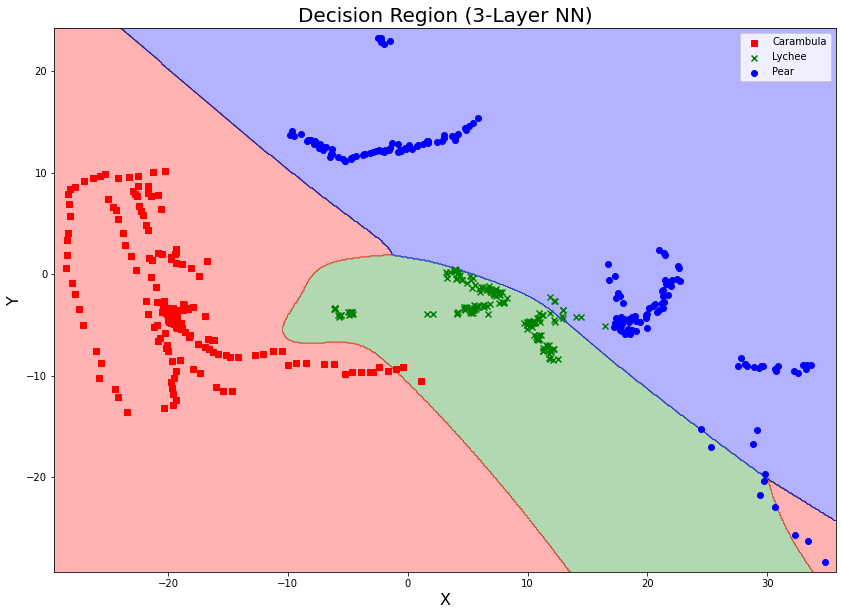

In [42]:
plot_decision_regions(X, target, MLP, hidden_size=3, resolution=0.1)